# Frequency Domain
SPI2 Basics on Image processing

Ecole Centrale Nantes

Diana Mateus

Participant: GRAMA SRINIVAS SHOURIE

## 0. Preparation 

### 0.1 Import the required modules


In [6]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import os
import skimage.io as io
from skimage.transform import resize
from scipy import fftpack


### 0.2 Define the main image folder
Make sure the subsequent parts of this notebook refer to this definition IMDIR. **When evaluating your notebook I should only need to change the path here** to run the entire notebook.

In [8]:
IMDIR = "./images1/Fourier/"
print(os.listdir(IMDIR))

#NOTE TO EVALUATOR: 
#This notebook performs image compression using the skimage.transform.resize function. 
#Please change the directory in this cell to the directory with the test images.
#Please run the complete notebook and scroll to the bottom to check the output.
#Output of each image is seperated using a line of '%%%%%%%%%%%%%%'
#For every image, data of mean, max and min is printed after each step. Titles are mentioned for each image. 
#For gray-scale images, the original image, images after each steps, and the final compressed image are shown.Titles are 
#mentioned for each image. 
#For other images, all the fore-mentioned images are printed and images of each component are shown as well.
#I have also implemented image compression using another method, where I combine the I and Q channels into one channel(IQ),
#hence effectively reducing the size during compression. Hope you have got a chance to check it.

#Regards


['.DS_Store', 'house.gif', 's', 'squares.png', 'textures.jpg', 'tiled.png', 'zebra-wall.png']


## 1. The Discrete Fourier Transform




In this exercise we will compute and visualize a DFT using numpy's fft functions:
- ```np.fft.fft2```: computes the two-dimensional FFT of an image.
- ```np.fft.fftshift```: center the frecuencies in the middle of the image
- ```np.fft.ifftshift```: reverses the centering
- ```np.fft.ifft2```: inverse fourier transform
- ```np.real```: takes the real components of a complex number
- ```np.abs```: recovers the magnitude of a complex number
- ```np.angle```: recovers the phase of a complex number 
- ```np.log```: computes the logarithm

The following code uses the above functions applied to the provided images, and shows

**a)** the original image 

**b)** the magnitude of its fft (scaled logarithmically)

**c)** the magnitude of its **centered(shifted)** Discrete Fourier transform fft (scaled logarithmically)

**c)** the inverse fft of the above transformed image (all the steps shouls be reversed)

**d) For each image explain how to interpret the FFT images**


# IMAGES IN FOURIER FOLDER

./images1/Fourier/house.gif
(256, 256)


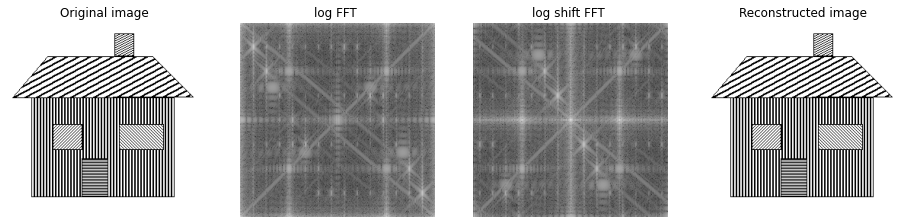

./images1/Fourier/squares.png
(141, 142)


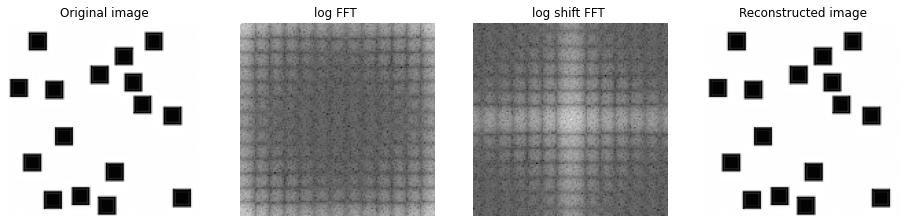

./images1/Fourier/textures.jpg
(165, 220)


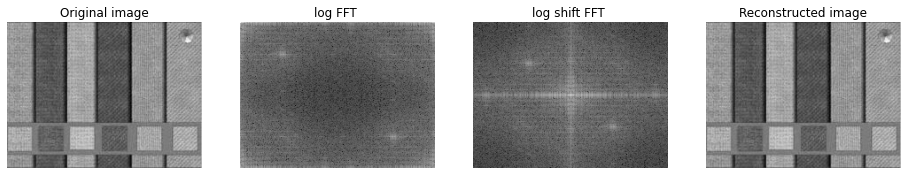

./images1/Fourier/tiled.png
(359, 320)


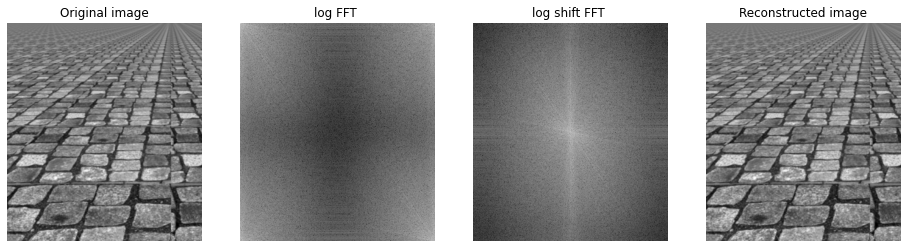

./images1/Fourier/zebra-wall.png
(346, 518)


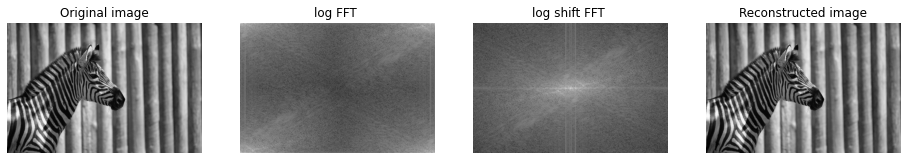

In [9]:
SUBDIR = IMDIR 


for root, dirnames, filenames in os.walk(SUBDIR):
    # print path to all filenames.
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            print(f)
            
            im = io.imread(f,as_gray=True)
            #im = resize(im,(100,100),mode='constant') #Uncomment this line if it is too slow
            print(im.shape)
            
            # TO EXPLAIN BY STUDENTS
            im_fft = np.fft.fft2(im)
            im_fft_shifted=np.fft.fftshift(im_fft)
            im_fft_shifted=im_fft_shifted[:,:]
            im_recon = np.real(np.fft.ifft2(np.fft.ifftshift(im_fft_shifted)))
            # END TO EXPLAIN BY STUDENTS
            
            
            fig=plt.figure(figsize=(16, 18))

            plt.subplot(141)
            plt.title('Original image')
            plt.imshow(im)
            plt.gray()
            plt.axis('off')

            
            plt.subplot(142)
            plt.title('log FFT ')
            plt.imshow(np.log(np.abs(im_fft)))
            plt.gray()
            plt.axis('off')
                        
            plt.subplot(143)
            plt.title('log shift FFT ')
            plt.imshow(np.log(np.abs(im_fft_shifted)))
            plt.gray()
            plt.axis('off')

            
            plt.subplot(144)
            plt.title('Reconstructed image')
            plt.imshow(im_recon)
            plt.gray()
            plt.axis('off')
            
            plt.show()

##  2. PROJECT JPEG

**Introduction**

The jpeg compression follows several steps

**i)** Convert images from RGB to YIQ color space

**ii)** Reduce the size (to half) of the I and Q channels

**iii)** An image is first subdivided in 8x8 subblocks (assuming the original image has sides whose length is a multiple of 8, if it is not the case just resize it).

**iv)** A frequency transformation is computed for each block (computed with a discrete cosine transform DCT II )
```
fftpack.dct(fftpack.dct(im.T, norm='ortho').T, norm='ortho')
```
**v)** The DCT results are then divided by the elements of the the quantization matrices given in ```quantization_table```. The resulting values are then rounded and stored as integers. **Hint:** use the functions  ```round()```, ```astype(np.int32)```

**vi)** The result of quantization (which should have many zeros) is then compressed Run Lenght Coding and Huffman coding to reduce the size. The compressed values are saved together with the quantization table.

**vii)** The reconstruction of the image implies inverting the encoding, the quantization and the dct.



**Instructions**

- This project is individual! This means both the code and report should be original and different for each of you. The 0 grade will apply for any attempt to break this rule.

- You are expected to return both the jupyter notebook along with a report explaining the method and the results of the jpeg compression on SEVERAL images.


- You are **ONLY** allowed to use:
    - any ``numpy`` and ``matplotlib`` functions 
    - ``io.imread`` to read the images
    - the provided functions to compute the ``dct``  
    - the provided functions to compute the quantization matrix ```quantization_table```. 
    - other functions from ``skimage`` are not needed!!! I will tolerate them only in the case you completely explain in the report (with descriptions and equations)  what this functions do.


- If you use code from an external source, this source should be cited. Failinig to do so, also leads to a grade of 0.


- The first cell of the notebook must start with the definition of the ```filename``` variable, which especifies the path of the image that will be compressed. To test your code on other images, I will only change this line. The code should run adapting to any input image.


- Implement all the jpeg compression steps (i-v) . Do **NOT** implement step vi) Run Lenght Code and Huffman coding


- Create **one function for each step**. Demonstrate the results of each step by calling each function: Show with images or graphs how the input image/list/data looks like before and after applying that function.


- Implement the inverse steps, to go from the quantized dct values to the reconstructed images. Again use one function per step, and illustrate its results


- Create a global jpegCompress function englobing steps i-v and a jpegDecompress function englobin steps in vii)


- Call the jpegCompress and jpeg Decompress function on several images: e.g. before and after applying a gaussian filter, before and after downsizing the image, on images with high or low frequency content. Compare the images (e.g. by computing their differences). Write some comments for every experiment you try. 


- Compare how the frequency representation of the original and the compressed images, look at the spectrum magnitude and phase. You may also want to compare the histogram of the frequency components.

**BONUS** Replace the given DCT function by your own basis implementation. Explain any difference.


In [10]:
#SHOULD PRINT LIST OF ALL IMAGES, ORIGINAL, Y, I, Q, IMAGES AFTER EACH FUNCTION, & RGB

In [11]:
#ATTENTION The quatization table assumes the original image intensities before the dct are between 0 and 255


def dct_2d(im):
    return fftpack.dct(fftpack.dct(im.T, norm='ortho').T, norm='ortho')

def idct_2d(im):
    return fftpack.idct(fftpack.idct(im.T, norm='ortho').T, norm='ortho')

def quantization_table(component='lum'):
    # Quantization Table for: Photoshop 
    # (http://www.impulseadventure.com/photo/jpeg-quantization.html)
    if component == 'lum':
        q = np.array([[2, 2, 2, 2, 3, 4, 5, 6],
                      [2, 2, 2, 2, 3, 4, 5, 6],
                      [2, 2, 2, 2, 4, 5, 7, 9],
                      [2, 2, 2, 4, 5, 7, 9, 12],
                      [3, 3, 4, 5, 8, 10, 12, 12],
                      [4, 4, 5, 7, 10, 12, 12, 12],
                      [5, 5, 7, 9, 12, 12, 12, 12],
                      [6, 6, 9, 12, 12, 12, 12, 12]])
    elif component == 'chrom':
        q = np.array([[3, 3, 5, 9, 13, 15, 15, 15],
                      [3, 4, 6, 11, 14, 12, 12, 12],
                      [5, 6, 9, 14, 12, 12, 12, 12],
                      [9, 11, 14, 12, 12, 12, 12, 12],
                      [13, 14, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12]])
    else:
        raise ValueError((
            "component should be either 'lum' or 'chrom', "
            "but '{comp}' was found").format(comp=component))

    return q

def nearestEighthMultiple(num):
    for i in range(0,8):
        
        rem=num%8
        if rem==0:
            break
        num=num-1
    return num


def convertToYIQ(im):
    k=im.shape
    #print(k)
    YIQ=np.zeros(k);
    for i in range(k[0]):
        for j in range(k[1]):                                          #if R, G and B have domain [0,255]
            YIQ[i,j,0]=0.299*im[i,j,0]+0.587*im[i,j,1]+0.114*im[i,j,2] #Y has range [0,255]
            YIQ[i,j,1]=0.596*im[i,j,0]-0.275*im[i,j,1]-0.321*im[i,j,2] #I has range [-151.98,151.98]
            YIQ[i,j,2]=0.212*im[i,j,0]-0.523*im[i,j,1]+0.311*im[i,j,2] #Q has range [-133.365,133.365]

    return(YIQ)

def yuvToYuv422(y,a,b):
        
    y = resize(y,(hC,wC),mode='constant',preserve_range=True)
    a = resize(a,(hC/2,wC/2),mode='constant',preserve_range=True)
    b = resize(b,(hC/2,wC/2),mode='constant',preserve_range=True)

    return y,a,b

def yuv422ToYuv(y,a,b):
        
    y = resize(y,(hC,wC),mode='constant',preserve_range=True)
    a = resize(a,(hC,wC),mode='constant',preserve_range=True)
    b = resize(b,(hC,wC),mode='constant',preserve_range=True)
        
    return y,a,b

def fragmentation(im,rP,cP):

    arr=np.zeros([8,8], dtype=int)
    listOfImages=[]
    for i in range(rP):
        for j in range(cP):
            for x in range(8):
                for y in range(8):
                    arr[x,y]=im[8*i+x,8*j+y]
            listOfImages.append(arr)
            arr=np.zeros([8,8], dtype=int)
    
    return listOfImages

def assemble(listOfImages,rP,cP):
    
    num=len(listOfImages)
    imAssemble=np.zeros([8*rP,8*cP], dtype=int)
    for x in range(rP):
        for y in range(cP):
            arr=np.copy(listOfImages[cP*x+y])
            for i in range(8):
                for j in range(8):
                    imAssemble[8*x+i,8*y+j]=arr[i,j]
                    
    return imAssemble

def applyDCT(yFragment,iFragment,qFragment):
    k=len(yFragment)
    v=len(iFragment)
    yDCT=[]
    iDCT=[]
    qDCT=[]
    
    for i in range(k):
        z=np.copy(yFragment[i])
        z=dct_2d(z)
        yDCT.append(z)
        
    for i in range(v):
        z=np.copy(iFragment[i])
        z=dct_2d(z)
        iDCT.append(z)
        
        m=np.copy(qFragment[i])
        m=dct_2d(m)
        qDCT.append(m)
        
    afterDCTy,afterDCTi,afterDCTq,afterDCT=assembleYIQForDisplay(yDCT,iDCT,qDCT) 
    
    
    return yDCT,iDCT,qDCT,afterDCTy,afterDCTi,afterDCTq,afterDCT

def divideByQuantTables(yDCT,iDCT,qDCT):
    yDCTd=[]
    iDCTd=[]
    qDCTd=[]
    lum=quantization_table(component='lum')
    chrom=quantization_table(component='chrom')
    
    for i in range(len(yDCT)):
        z=np.copy(yDCT[i])
        z=np.divide(z,lum)
        z=np.rint(z)
        yDCTd.append(z)

    for i in range(len(iDCT)):
        z=np.copy(iDCT[i])
        z=np.divide(z,chrom)
        z=np.rint(z)
        iDCTd.append(z)
        
        m=np.copy(qDCT[i])
        m=np.divide(m,chrom)
        m=np.rint(m)
        qDCTd.append(m)
        
    afterDividey,afterDividei,afterDivideq,afterDivide=assembleYIQForDisplay(yDCTd,iDCTd,qDCTd)
    
    return yDCTd,iDCTd,qDCTd,afterDividey,afterDividei,afterDivideq,afterDivide

def multiplyByQuantTables(yDCTd,iDCTd,qDCTd):
    iyDCT=[]
    iiDCT=[]
    iqDCT=[]
    lum=quantization_table(component='lum')
    chrom=quantization_table(component='chrom')
    
    for i in range(len(yDCTd)):
        z=np.copy(yDCTd[i])
        z=np.multiply(z,lum)
        iyDCT.append(z)

    for i in range(len(iDCTd)):
        z=np.copy(iDCTd[i])
        z=np.multiply(z,chrom)
        iiDCT.append(z)
        
        m=np.copy(qDCTd[i])
        m=np.multiply(m,chrom)
        iqDCT.append(m)
        
    afterMultipley,afterMultiplei,afterMultipleq,afterMultiply=assembleYIQForDisplay(iyDCT,iiDCT,iqDCT)
    
    return iyDCT,iiDCT,iqDCT,afterMultipley,afterMultiplei,afterMultipleq,afterMultiply

def applyIDCT(iyDCT,iiDCT,iqDCT):
    k=len(iyDCT)
    v=len(iiDCT)
    iy=[]
    ii=[]
    iq=[]
        
    for i in range(k):
        z=np.copy(iyDCT[i])
        z=idct_2d(z)
        iy.append(z)
    for i in range(v):
        z=np.copy(iiDCT[i])
        p=idct_2d(z)
        ii.append(p)
        
        m=np.copy(iqDCT[i])
        t=idct_2d(m)        
        iq.append(t)
    
    afterIDCTy,afterIDCTi,afterIDCTq,afterIDCT=assembleYIQForDisplay(iy,ii,iq)
    
    return iy,ii,iq,afterIDCTy,afterIDCTi,afterIDCTq,afterIDCT

def convertToRGB(im):
    k=im.shape
    #print(k)
    RGB=np.zeros(k);
    for i in range(k[0]):
        for j in range(k[1]):
            RGB[i,j,0]=1*im[i,j,0]+0.956*im[i,j,1]+0.619*im[i,j,2]
            RGB[i,j,1]=1*im[i,j,0]-0.272*im[i,j,1]-0.647*im[i,j,2]
            RGB[i,j,2]=1*im[i,j,0]-1.106*im[i,j,1]+1.703*im[i,j,2]

    return(RGB)

def assembleYIQForDisplay(a,b,c):
    aAssembled=assemble(a,int(rP),int(cP))
    bAssembled=assemble(b,int(rP/2),int(cP/2))
    cAssembled=assemble(c,int(rP/2),int(cP/2))

    aAssembled,bAssembled,cAssembled=yuv422ToYuv(aAssembled,bAssembled,cAssembled)
    
    abcLayered=np.zeros([hC,wC,3],dtype="float")
    abcLayered[:,:,0]=aAssembled
    abcLayered[:,:,1]=bAssembled
    abcLayered[:,:,2]=cAssembled

    return aAssembled,bAssembled,cAssembled,abcLayered



def jpegCompress(im):
    h = im.shape[0]
    w = im.shape[1]
    hC=nearestEighthMultiple(h)
    wC=nearestEighthMultiple(w)
    im = resize(im,(hC,wC),mode='constant',preserve_range=True)
    print("im - shape, min, max, mean, std")
    print(im.shape, im.min(),im.max(),im.mean(),im.std())
    
    YIQ=convertToYIQ(im)   
    Y=np.copy(YIQ[:,:,0])
    I=np.copy(YIQ[:,:,1])
    Q=np.copy(YIQ[:,:,2])

    y,i,q=yuvToYuv422(Y,I,Q)  
    
    imageDisplayList.append(Y)
    imageDisplayList.append(I)
    imageDisplayList.append(Q)    
    
    y=y-127    #centres the values of y around 0
    #i=i-127   #i and q are already centered around zero
    #q=q-127
    
    yFragment=fragmentation(y,rP,cP)
    iFragment=fragmentation(i,int(rP/2),int(cP/2))
    qFragment=fragmentation(q,int(rP/2),int(cP/2))
    
    yDCT,iDCT,qDCT,afterDCTy,afterDCTi,afterDCTq,afterDCT=applyDCT(yFragment,iFragment,qFragment)
    
    imageDisplayList.append(afterDCTy)
    imageDisplayList.append(afterDCTi)
    imageDisplayList.append(afterDCTq)
    imageDisplayList.append(afterDCT)
    infoList.append(["After DCT       ",int(afterDCT.mean()),int(afterDCT.max()),int(afterDCT.min())])
    
    yDCTd,iDCTd,qDCTd,afterDividey,afterDividei,afterDivideq,afterDivide=divideByQuantTables(yDCT,iDCT,qDCT)

    imageDisplayList.append(afterDividey)
    imageDisplayList.append(afterDividei)
    imageDisplayList.append(afterDivideq)
    imageDisplayList.append(afterDivide)
    infoList.append(["After Divide    ",int(afterDivide.mean()),int(afterDivide.max()),int(afterDivide.min())])

    
    return yDCTd,iDCTd,qDCTd


def jpegDecompress(yDCTd,iDCTd,qDCTD):
    iyDCT,iiDCT,iqDCT,afterMultipley,afterMultiplei,afterMultipleq,afterMultiply=multiplyByQuantTables(yDCTd,iDCTd,qDCTd) 

    imageDisplayList.append(afterMultipley)
    imageDisplayList.append(afterMultiplei)
    imageDisplayList.append(afterMultipleq)
    imageDisplayList.append(afterMultiply)
    infoList.append(["After Multiply  ",int(afterMultiply.mean()),int(afterMultiply.max()),int(afterMultiply.min())])

    
    
    iy,ii,iq,afterIDCTy,afterIDCTi,afterIDCTq,afterIDCT=applyIDCT(iyDCT,iiDCT,iqDCT)
    
    imageDisplayList.append(afterIDCTy)
    imageDisplayList.append(afterIDCTi)
    imageDisplayList.append(afterIDCTq)
    imageDisplayList.append(afterIDCT)
    infoList.append(["After IDCT      ",int(afterIDCT.mean()),int(afterIDCT.max()),int(afterIDCT.min())])

    
    
    iyAssembled=assemble(iy,rP,cP)
    iiAssembled=assemble(ii,int(rP/2),int(cP/2))
    iqAssembled=assemble(iq,int(rP/2),int(cP/2))
    
    iyFinal,iicFinal,iqcFinal=yuv422ToYuv(iyAssembled,iiAssembled,iqAssembled)  
    
    iyFinal=iyFinal+127  #putting back values of y in [0,255]
    
    YIQFinal=np.zeros([hC,wC,3],dtype=float)

    YIQFinal[:,:,0]=iyFinal[:,:]
    YIQFinal[:,:,1]=iicFinal[:,:]
    YIQFinal[:,:,2]=iqcFinal[:,:]
    
    imageDisplayList.append(iyFinal)
    imageDisplayList.append(iicFinal)
    imageDisplayList.append(iqcFinal)       

    RGB=convertToRGB(YIQFinal)
    RGB = resize(RGB,(h,w),mode='constant',preserve_range=True)
    RGB=RGB.astype(np.uint8)
    infoList.append(["RGB             ",int(RGB.mean()),int(RGB.max()),int(RGB.min())])
    
    return RGB

def showImages(imageDisplayList):
    plt.subplot(6,4,1)
    plt.title("Original image")
    plt.imshow(imageDisplayList[0],cmap="gray")
    plt.axis('off')
    
    plt.subplot(6,4,2)
    plt.title("Y component of original image")
    plt.imshow(imageDisplayList[1],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,3)
    plt.title("I component of original image")
    plt.imshow(imageDisplayList[2],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,4)
    plt.title("Q component of original image")
    plt.imshow(imageDisplayList[3],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,5)
    plt.title("After DCT, Y")
    plt.imshow(imageDisplayList[4],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,6)
    plt.title("After DCT, I")
    plt.imshow(imageDisplayList[5],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,7)
    plt.title("After DCT, Q")
    plt.imshow(imageDisplayList[6],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,8)
    plt.title("After DCT")
    plt.imshow(imageDisplayList[7],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,9)
    plt.title("After dividing, Y")
    plt.imshow(imageDisplayList[8],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,10)
    plt.title("After dividing, I")
    plt.imshow(imageDisplayList[9],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,11)
    plt.title("After dividing, Q")
    plt.imshow(imageDisplayList[10],cmap="gray")
    plt.axis('off')
    
    plt.subplot(6,4,12)
    plt.title("After dividing")
    plt.imshow(imageDisplayList[11],cmap="gray")
    plt.axis('off')
    
    plt.subplot(6,4,13)
    plt.title("After multiplying, Y")
    plt.imshow(imageDisplayList[12],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,14)
    plt.title("After multiplying, I")
    plt.imshow(imageDisplayList[13],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,15)
    plt.title("After multiplying, Q")
    plt.imshow(imageDisplayList[14],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,16)
    plt.title("After multiplying")
    plt.imshow(imageDisplayList[15],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,17)
    plt.title("After IDCT, Y")
    plt.imshow(imageDisplayList[16],cmap="gray")
    plt.axis('off')
    
    plt.subplot(6,4,18)
    plt.title("After IDCT, I")
    plt.imshow(imageDisplayList[17],cmap="gray")  
    plt.axis('off')

    plt.subplot(6,4,19)
    plt.title("After IDCT, Q")
    plt.imshow(imageDisplayList[18],cmap="gray")
    plt.axis('off')
    
    plt.subplot(6,4,20)
    plt.title("After IDCT")
    plt.imshow(imageDisplayList[19],cmap="gray")
    plt.axis('off')
    
    plt.subplot(6,4,21)
    plt.title("Y component of compressed image")
    plt.imshow(imageDisplayList[20],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,22)
    plt.title("I component of compressed image")
    plt.imshow(imageDisplayList[21],cmap="gray")
    plt.axis('off')
    
    plt.subplot(6,4,23)
    plt.title("Q component of compressed image")
    plt.imshow(imageDisplayList[22],cmap="gray")
    plt.axis('off')

    plt.subplot(6,4,24)
    plt.title("Final RGB compressed")
    plt.imshow(imageDisplayList[23],cmap="gray")
    plt.axis('off')

def printInfoList(infoList):
    print("                  Mean  Max  Min")
    for i in range(len(infoList)):
        print(infoList[i])
      

        
    

In [12]:
def applyDCT2d(picFragment):
    k=len(picFragment)
    picDCT=[]

    for i in range(k):
        z=np.copy(picFragment[i])
        z=dct_2d(z)
        picDCT.append(z)
                
    return picDCT

def divideByQuantTables2d(picDCT):
    picDCTd=[]
    lum=quantization_table(component='lum')
    chrom=quantization_table(component='chrom')
    
    for i in range(len(picDCT)):
        z=np.copy(picDCT[i])
        z=np.divide(z,lum)
        z=np.rint(z)
        picDCTd.append(z)

    return picDCTd

def multiplyByQuantTables2d(picDCTd):
    ipicDCT=[]
    lum=quantization_table(component='lum')
    chrom=quantization_table(component='chrom')

    for i in range(len(picDCTd)):
        z=np.copy(picDCTd[i])
        z=np.multiply(z,lum)
        ipicDCT.append(z)

    
    return ipicDCT

def applyIDCT2d(ipicDCT):
    k=len(ipicDCT)
    ipic=[]
    
    for i in range(k):
        z=np.copy(ipicDCT[i])
        z=idct_2d(z)
        ipic.append(z)
        
    return ipic

def jpegCompress2d(im):
    h = im.shape[0]
    w = im.shape[1]
    hC=nearestEighthMultiple(h)
    wC=nearestEighthMultiple(w)
    im = resize(im,(hC,wC),mode='constant',preserve_range=True)
    print("im - shape, min, max, mean, std")
    print(im.shape, im.min(),im.max(),im.mean(),im.std())
    pic=np.copy(im)
    pic=pic.astype(int)

    pic=pic-127

    picFragment=fragmentation(pic,rP,cP)

    picDCT=applyDCT2d(picFragment) 
    picDCTdisp=assemble(picDCT,rP,cP)
    imageDisplayList.append(picDCTdisp)
    infoList.append(["After DCT     ",int(picDCTdisp.mean()),int(picDCTdisp.max()),int(picDCTdisp.min())])

    picDCTd=divideByQuantTables2d(picDCT) 
    picDCTddisp=assemble(picDCTd,rP,cP)
    imageDisplayList.append(picDCTddisp)
    infoList.append(["After Divide  ",int(picDCTddisp.mean()),int(picDCTddisp.max()),int(picDCTddisp.min())])
    
    return picDCTd

def jpegDecompress2d(picDCTd):
    ipicDCT=multiplyByQuantTables2d(picDCTd) 
    ipicDCTdisp=assemble(ipicDCT,rP,cP)
    imageDisplayList.append(ipicDCTdisp)
    infoList.append(["After Multiply ",int(ipicDCTdisp.mean()),int(ipicDCTdisp.max()),int(ipicDCTdisp.min())])
    
    ipic=applyIDCT2d(ipicDCT) 
    ipicdisp=assemble(ipic,rP,cP)
    imageDisplayList.append(ipicdisp)
    infoList.append(["After IDCT     ",int(ipicdisp.mean()),int(ipicdisp.max()),int(ipicdisp.min())])
    
    ipicAssembled=assemble(ipic,rP,cP)

    ipicFinal=np.copy(ipicAssembled)
    ipicFinal=ipicFinal+127

    
    RGB=np.copy(ipicFinal)
    RGB = resize(RGB,(h,w),mode='constant',preserve_range=True)
    
    RGB=RGB.astype(np.uint8)
    infoList.append(["RGB            ",int(RGB.mean()),int(RGB.max()),int(RGB.min())])

    
    return RGB

def showImages2d(imageDisplayList):
    plt.subplot(3,2,1)
    plt.title("Original image")
    plt.imshow(imageDisplayList[0],cmap="gray")
    plt.axis('off')
    
    plt.subplot(3,2,2)
    plt.title("After DCT")
    plt.imshow(imageDisplayList[1],cmap="gray")
    plt.axis('off')    

    plt.subplot(3,2,3)
    plt.title("After Dividing")
    plt.imshow(imageDisplayList[2],cmap="gray")
    plt.axis('off')

    plt.subplot(3,2,4)
    plt.title("After Multiplying")
    plt.imshow(imageDisplayList[3],cmap="gray")
    plt.axis('off')

    plt.subplot(3,2,5)
    plt.title("After IDCT")
    plt.imshow(imageDisplayList[4],cmap="gray")
    plt.axis('off')

    plt.subplot(3,2,6)
    plt.title("RGB compressed")
    plt.imshow(imageDisplayList[5],cmap="gray")
    plt.axis('off')


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

./images1/Fourier/house.gif
----------- 2d Image -----------
im - shape, min, max, mean, std
(256, 256) 0.0 255.0 193.8282012939452 108.65001961651647
                  Mean  Max  Min
['Original image', 193, 255, 0]
['After DCT     ', 3, 1024, -1015]
['After Divide  ', 2, 512, -338]
['After Multiply ', 3, 1024, -1014]
['After IDCT     ', 66, 136, -135]
['RGB            ', 189, 255, 0]



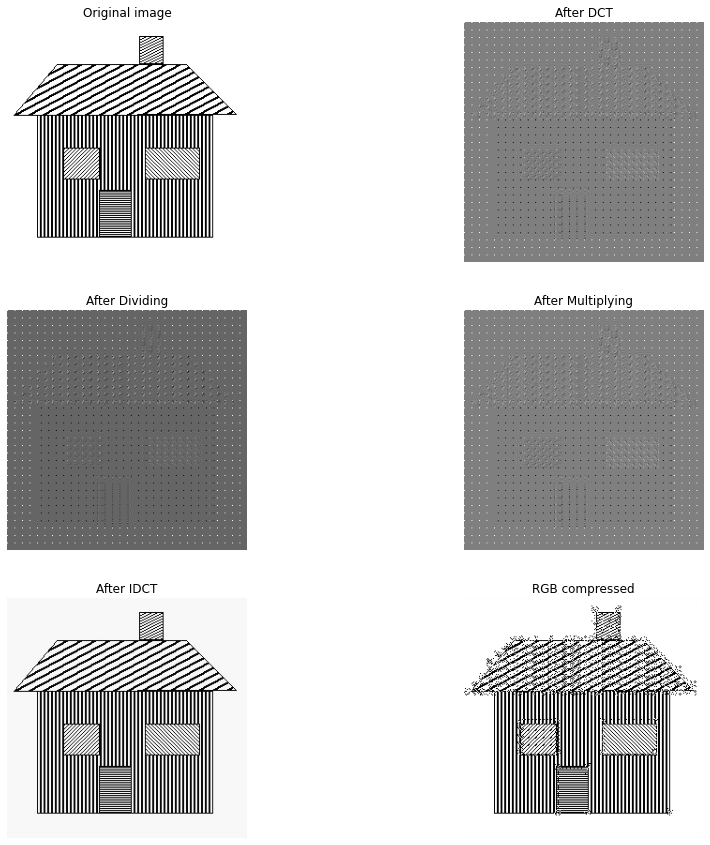

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

./images1/Fourier/squares.png
----------- 3d Image -----------
im - shape, min, max, mean, std
(136, 136, 4) 0.49540441176521605 255.0 228.48386747193268 71.58643291129118


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


                  Mean  Max  Min
['Original image', 228, 255, 0]
['After DCT       ', 3, 1013, -954]
['After Divide    ', 2, 506, -477]
['After Multiply  ', 3, 1013, -955]
['After IDCT      ', 30, 132, -130]
['RGB             ', 218, 255, 0]



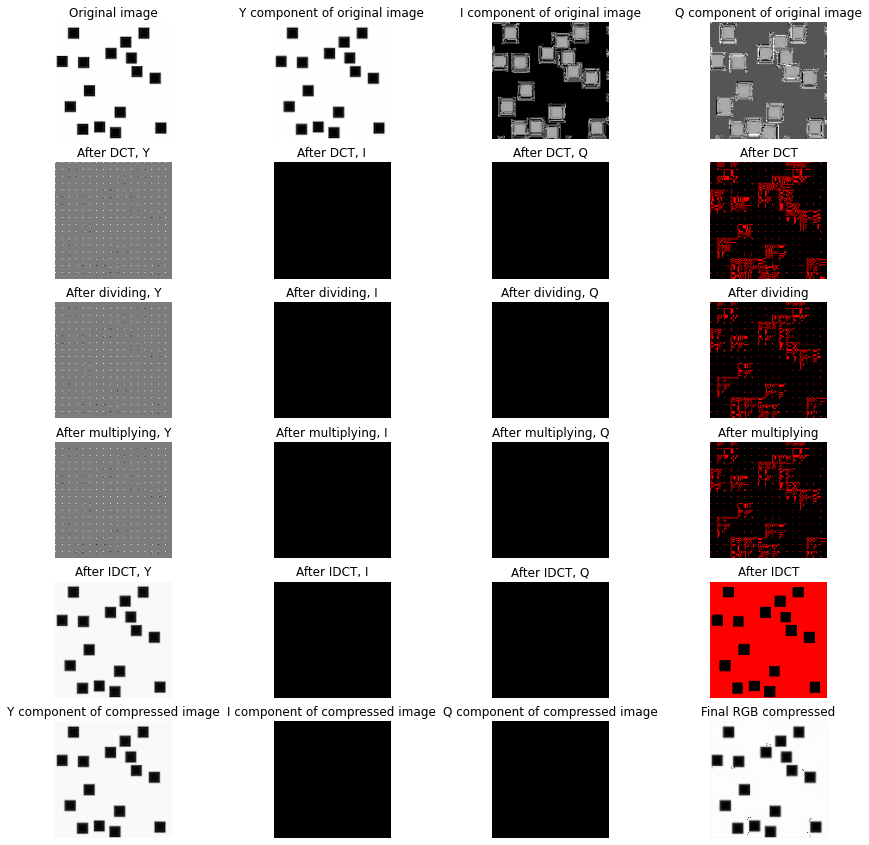

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

./images1/Fourier/textures.jpg
----------- 3d Image -----------
im - shape, min, max, mean, std
(160, 216, 3) 4.687355324075137 248.73813657407482 107.02910116062243 37.378099186894964


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


                  Mean  Max  Min
['Original image', 107, 255, 0]
['After DCT       ', 0, 286, -472]
['After Divide    ', 0, 143, -236]
['After Multiply  ', 0, 287, -473]
['After IDCT      ', 2, 95, -104]
['RGB             ', 107, 253, 0]



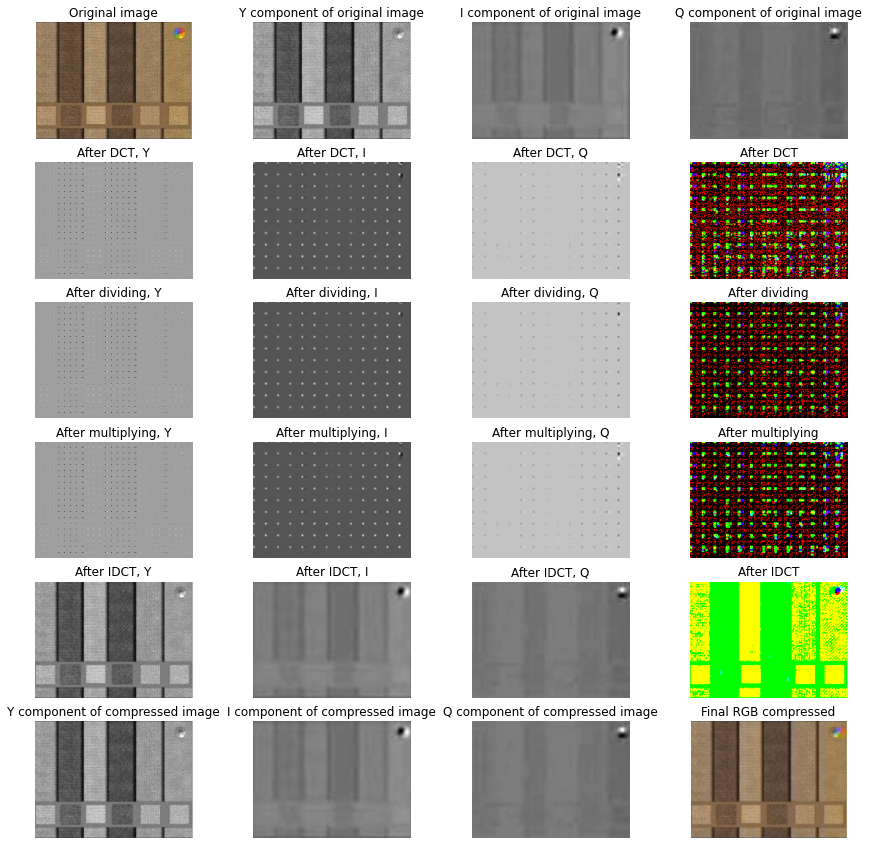

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

./images1/Fourier/tiled.png
----------- 3d Image -----------
im - shape, min, max, mean, std
(352, 320, 4) 1.0000000000002274 255.0 148.68463538619108 68.3777557725312


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


                  Mean  Max  Min
['Original image', 148, 255, 1]
['After DCT       ', 0, 521, -752]
['After Divide    ', 0, 260, -376]
['After Multiply  ', 0, 521, -753]
['After IDCT      ', -5, 116, -125]
['RGB             ', 113, 255, 1]



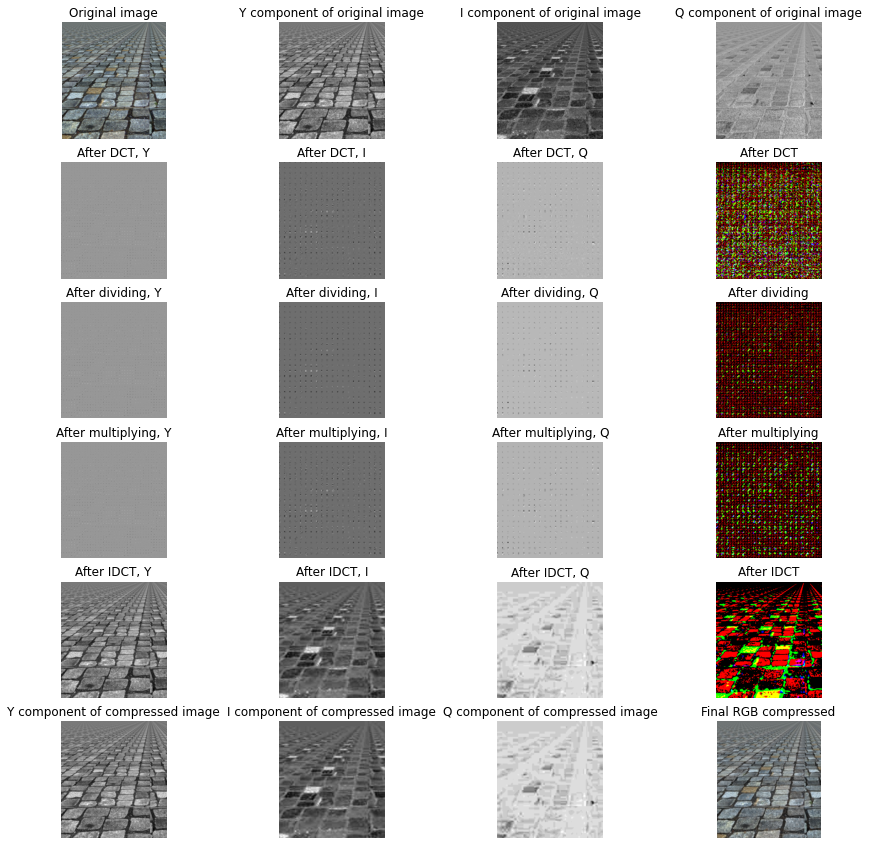

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

./images1/Fourier/zebra-wall.png
----------- 3d Image -----------
im - shape, min, max, mean, std
(344, 512, 3) 5.693098201308197 254.94726562499994 115.55653436696055 53.66872423644955


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


                  Mean  Max  Min
['Original image', 115, 255, 5]
['After DCT       ', 0, 967, -887]
['After Divide    ', 0, 484, -443]
['After Multiply  ', 0, 968, -887]
['After IDCT      ', -2, 126, -118]
['RGB             ', 115, 255, 0]



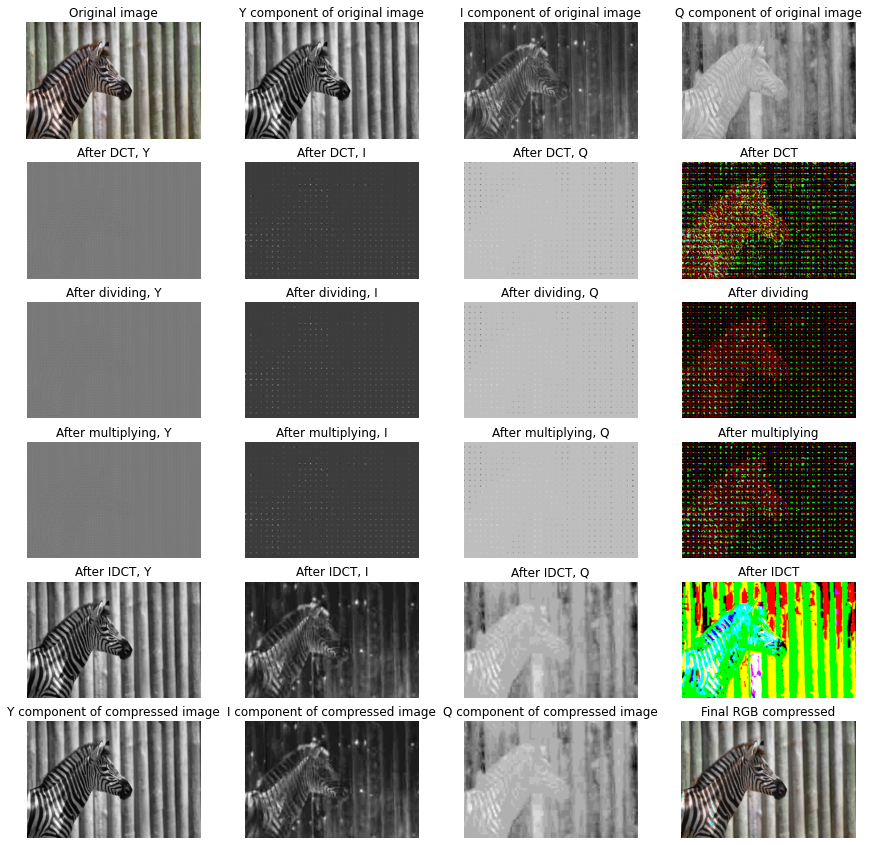

In [13]:
width=15
height=15
plt.rcParams['figure.figsize'] = [width, height]

for root, dirnames, filenames in os.walk(IMDIR):
    # print path to all filenames.
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
            print()
            print(f)
            im = io.imread(f)
            originalShape=im.shape

            #Resize small first to debug
            h = originalShape[0]
            w = originalShape[1]
            hC=nearestEighthMultiple(h)
            wC=nearestEighthMultiple(w)

            imageDisplayList=[]
            imageDisplayList.append(im)
            
            infoList=[]
            d=["Original image",int(im.mean()),int(im.max()),int(im.min())]
            infoList.append(d)

            k=im.shape
            rP=int(hC/8)
            cP=int(wC/8)

            if len(originalShape)==3:
                print("----------- 3d Image -----------")
    
                yDCTd,iDCTd,qDCTd=jpegCompress(im)
                RGB=jpegDecompress(yDCTd,iDCTd,qDCTd)
    
                imageDisplayList.append(RGB)
    
                showImages(imageDisplayList)

    
            else:
                print("----------- 2d Image -----------")
    
                picDCTd=jpegCompress2d(im)
                RGB=jpegDecompress2d(picDCTd)
    
                imageDisplayList.append(RGB)
    
                showImages2d(imageDisplayList)

            printInfoList(infoList)
            print()

            plt.show()

In [15]:
#showImages(imageDisplayList)

